In [ ]:
import numpy as np
import pandas as pd
import transformers
import torch

from tqdm import tqdm, trange
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder



2024-05-27 11:23:47.803927: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 11:23:47.852962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 11:23:48.748362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
df = pd.read_csv('/home/vikrant/Desktop/Thesis/Thesis_Projects/URL_detection/Githubdataset/dataset_full.csv')
df.head(50)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


In [ ]:
# Display the first few rows of the dataset to understand its structure
print("Initial DataFrame:")
print(df.head())

# Remove constant features
df = df.loc[:, (df != df.iloc[0]).any()]

# Check the structure of the DataFrame after removing constant features
print("\nDataFrame after removing constant features:")
df.head(50)

Initial DataFrame:
   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                1                2   
1        

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


In [ ]:
print(len(df))

88647


In [ ]:
X = df.drop(columns=['phishing'])
y = df['phishing']

# Encode target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Balance the dataset using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='target')

# Combine the features and target variable into a single DataFrame
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
print(len(balanced_df))

95587


In [ ]:
balanced_df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,target
0,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,1,2,1,43197,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95582,1,0,0,1,0,0,0,0,0,0,...,5,2,0,291,1,0,0,0,0,1
95583,2,0,1,4,0,0,0,0,0,0,...,1,3,0,1994,0,0,0,0,0,1
95584,3,5,3,1,0,5,0,4,0,0,...,2,4,0,48,0,0,0,0,0,1
95585,1,0,0,1,0,0,0,0,0,0,...,1,5,2,596,1,0,0,0,0,1


In [ ]:
data = balanced_df

# Assuming the last column is the label
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,-1,1,2,2,291,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,-1,1,2,1,3134,1,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,1063,1,2,1,43197,0,1,0,0,0


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Compute feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_importances = rf_importances.sort_values(ascending=False)

In [ ]:
# Select top 46 features
top_k = 46
selected_features = rf_importances.head(top_k).index
X_selected = X[selected_features]

In [ ]:
# Concatenate features into a single string
X_selected['feature_string'] = X_selected.apply(lambda row: '/'.join(row.values.astype(str)), axis=1)

# Prepare the final DataFrame
final_df = pd.DataFrame({'features': X_selected['feature_string'], 'label': y})

# Print the final DataFrame
print(final_df.head())

                                            features  label
0  -1.0/0.0/0.0/0.0/0.0/1.0/0.0/0.0/0.0/0.0/0.0/0...      0
1  6998.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0...      0
2  -1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-...      0
3  -1.0/0.0/0.0/0.0/2.0/18.0/0.0/0.0/0.0/0.0/0.0/...      0
4  6241.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0...      0


/tmp/ipykernel_16389/4135032937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['feature_string'] = X_selected.apply(lambda row: '/'.join(row.values.astype(str)), axis=1)


In [ ]:
len(final_df)

95587

In [ ]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

print(f'There are {torch.cuda.device_count()} GPU(s) available.')
print('Device name:', torch.cuda.get_device_name(0))

There are 1 GPU(s) available.
Device name: NVIDIA RTX A5000


In [ ]:
# Count unique occurrences of 0s and 1s in the dataset
label_counts = final_df['label'].value_counts()
print("Counts of unique labels:")
print(label_counts)

Counts of unique labels:
label
1    48849
0    46738
Name: count, dtype: int64


In [ ]:
sentences = final_df['features'].values
labels = final_df['label'].values

In [ ]:
sentences[0:5]

array(['-1.0/0.0/0.0/0.0/0.0/1.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/1.0/0.0/0.0/0.0/0.0/0.0/4766.0/-1.0/15.0/589.0/0.935901/0.0/0.0/0.0/0.0/0.0/0.0/0.0/2.0/0.0/14.0/3.0/3.0/2.0/1.0/0.0/2.0/0.0/1.0/0.0',
       '6998.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/53831.0/306.0/19.0/3597.0/0.410761/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/2.0/-1.0/19.0/1.0/5.0/2.0/0.0/-1.0/2.0/-1.0/1.0/-1.0',
       '-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/13446.0/-1.0/27.0/291.0/0.7101729999999999/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/2.0/-1.0/27.0/2.0/9.0/2.0/0.0/-1.0/2.0/-1.0/1.0/-1.0',
       '-1.0/0.0/0.0/0.0/2.0/18.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/0.0/3.0/0.0/0.0/0.0/0.0/0.0/55053.0/-1.0/46.0/3134.0/0.244512/0.0/0.0/0.0/0.0/0.0/0.0/0.0/2.0/0.0/28.0/1.0/9.0/2.0/3.0/0.0/2.0/0.0/1.0/0.0',
       '6241.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/-1.0/

In [ ]:
# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/home/vikrant/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# Tokenize the sentences
input_ids = []
attention_masks = []

max_length = 128  # Adjusted sequence length for better performance

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens=True,
                        max_length=max_length,
                        pad_to_max_length=True,
                        return_attention_mask=True,
                        return_tensors='pt',
                   )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/vikrant/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Split the data into 80% training and 20% test set
train_inputs, test_inputs, train_labels, test_labels = train_test_split(input_ids, labels,
                                                                        random_state=2018, test_size=0.2)
train_masks, test_masks, _, _ = train_test_split(attention_masks, attention_masks,
                                                 random_state=2018, test_size=0.2)

# Further split the training data into 75% training and 25% validation
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(train_inputs, train_labels,
                                                                                    random_state=2018, test_size=0.25)
train_masks, validation_masks, _, _ = train_test_split(train_masks, train_masks,
                                                       random_state=2018, test_size=0.25)

# Create the DataLoader for training, validation, and test sets
batch_size_train = 32
batch_size_val = 64

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size_train)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size_val)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size_val)


In [ ]:
# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)

model.to(device)

/home/vikrant/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/vikrant/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Set up the optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

epochs = 10
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


/home/vikrant/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Early stopping criteria
patience = 2
early_stopping_counter = 0
best_validation_loss = float('inf')

In [ ]:
# Training loop
loss_values, validation_loss_values = [], []

for epoch_i in range(0, epochs):
    print(f'Epoch {epoch_i + 1}/{epochs}')
    print('Training...')

    model.train()
    total_loss = 0

    # Shuffle the training data at the beginning of each epoch
    train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=batch_size_train)

    for step, batch in enumerate(train_dataloader):
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_train_loss)
    print(f'Average training loss: {avg_train_loss}')

    print('Running Validation...')
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    for batch in validation_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        tmp_eval_loss = outputs.loss.item()  # Adjusted this line to correctly access loss
        eval_loss += tmp_eval_loss

        preds_flat = np.argmax(logits, axis=1).flatten()
        labels_flat = label_ids.flatten()
        eval_accuracy += np.sum(preds_flat == labels_flat) / len(labels_flat)

        nb_eval_steps += 1

    avg_val_accuracy = eval_accuracy / nb_eval_steps
    avg_val_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(avg_val_loss)

    print(f'Validation Accuracy: {avg_val_accuracy}')
    print(f'Validation Loss: {avg_val_loss}')

    # Early stopping
    if avg_val_loss < best_validation_loss:
        best_validation_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print('Early stopping triggered.')
        break

print(f'Training complete!')

Epoch 1/10
Training...
Average training loss: 0.11915219142397775
Running Validation...
Validation Accuracy: 0.9729828595317725
Validation Loss: 0.08475386243263715
Epoch 2/10
Training...
Average training loss: 0.06774024368738467
Running Validation...
Validation Accuracy: 0.978992474916388
Validation Loss: 0.06500072022713098
Epoch 3/10
Training...
Average training loss: 0.052049251434278826
Running Validation...
Validation Accuracy: 0.9816053511705686
Validation Loss: 0.06657586243263691
Epoch 4/10
Training...
Average training loss: 0.03978093552854773
Running Validation...
Validation Accuracy: 0.9850020903010034
Validation Loss: 0.06197776950827261
Epoch 5/10
Training...
Average training loss: 0.030770601529004134
Running Validation...
Validation Accuracy: 0.9834866220735786
Validation Loss: 0.08400155849907921
Epoch 6/10
Training...
Average training loss: 0.02433405232243076
Running Validation...
Validation Accuracy: 0.9839046822742475
Validation Loss: 0.08091568077427147
Early sto

              precision    recall  f1-score   support

           0     0.9855    0.9860    0.9857      9276
           1     0.9868    0.9863    0.9865      9842

    accuracy                         0.9861     19118
   macro avg     0.9861    0.9861    0.9861     19118
weighted avg     0.9861    0.9861    0.9861     19118



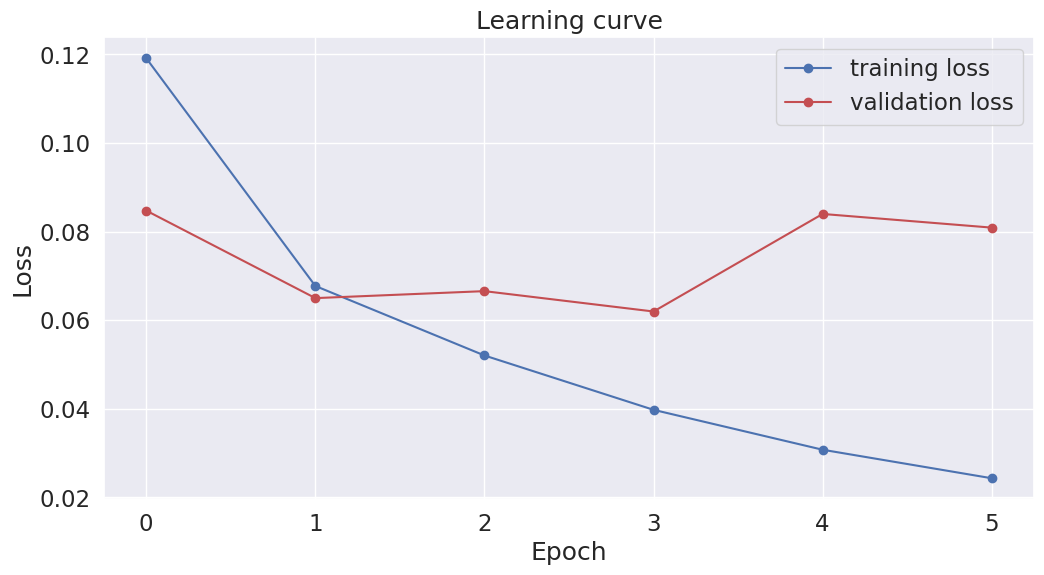

In [ ]:
# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate on the test set
model.eval()
predictions, true_labels = [], []

for batch in test_dataloader:
    b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs.logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

# Print classification report
print(classification_report(true_labels, predictions, digits=4))

# Plot the learning curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()